## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("titanic.xlsx")

### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


There are 1309 rows and 14 columns. We have integers, floats and objects for the data type.
pclass, survied, name, sex, cabin, emabarked, boat, body and home.dest are catagorical
age and parch are variable
ticket and fare could be both (There could be set rates for the ticket prices)

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

Columns, age, fare, cabin, embarked, boat, body and home.dest all have missing data.

The body column has the most missing date and embarked is only missing two entries.

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [5]:
df1 = df.drop(columns = ["cabin", "boat", "body", "home.dest"])

In [6]:
df1["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [7]:
df1["embarked"].fillna("S", inplace = True)

In [8]:
df1["fare"].fillna(df["fare"].mean(), inplace = True)

In [9]:
df1.dropna(subset = ["age"], inplace = True)

In [10]:
df1.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S


In [11]:
df1.info() #no missing data now.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   survived  1046 non-null   int64  
 2   name      1046 non-null   object 
 3   sex       1046 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1046 non-null   int64  
 6   parch     1046 non-null   int64  
 7   ticket    1046 non-null   object 
 8   fare      1046 non-null   float64
 9   embarked  1046 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 89.9+ KB


### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [12]:
df1['embarked'].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'], inplace = True)

In [43]:
df1['survived'].replace([0,1], ['Died', 'Survived'], inplace = True)

In [14]:
df1['pclass'].replace([1,2,3], ['1st Class', '2nd Class', '3rd Class'], inplace = True)

In [15]:
df1['Titanic Passenger'] = 1

In [16]:
df1['Family Size'] = df1['sibsp'] + df1['parch']

In [17]:
df1['Travel Alone'] = np.where(df1['Family Size'] > 0, 0, 1)

In [18]:
df1['Has Caregiver'] = np.where(((df1['age'] < 13) & (df1['Family Size'] > 0)), 1,0)

In [19]:
df1['Crew'] = np.where((df1['fare'] == 0), 1,0)

In [20]:
bins = [0, 3, 13, 18, 65, 120]
bin_labels = ['infant', 'child', 'teen', 'adult', 'senior']
df1["Age Group"] = pd.cut(df["age"], bins, labels = bin_labels)

In [21]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,1st Class,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,1,0,0,adult
1,1st Class,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,0,1,0,infant
2,1st Class,Died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,0,1,0,infant
3,1st Class,Died,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0,adult
4,1st Class,Died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0,adult


In [22]:
df1["Travel Alone"].replace([0, 1], ["No", "Yes"], inplace = True)

In [23]:
df1["Has Caregiver"].replace([0, 1], ["No", "Yes"], inplace = True)

In [24]:
df1["Crew"].replace([0, 1], ["No", "Yes"], inplace = True)

In [25]:
df1["Titanic Passenger"].replace(1, "Yes", inplace = True)

In [26]:
df1.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,1st Class,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,Yes,0,Yes,No,No,adult
1,1st Class,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,Yes,3,No,Yes,No,infant


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [27]:
df1['pclass'].value_counts()

3rd Class    501
1st Class    284
2nd Class    261
Name: pclass, dtype: int64

In [28]:
df1['survived'].value_counts()

Died        619
Survived    427
Name: survived, dtype: int64

In [29]:
df1['sex'].value_counts()

male      658
female    388
Name: sex, dtype: int64

In [30]:
df1['embarked'].value_counts()

Southampton    784
Cherbourg      212
Queenstown      50
Name: embarked, dtype: int64

In [31]:
df1['Titanic Passenger'].value_counts()

Yes    1046
Name: Titanic Passenger, dtype: int64

In [32]:
df1['Travel Alone'].value_counts()

Yes    590
No     456
Name: Travel Alone, dtype: int64

In [33]:
df1['Has Caregiver'].value_counts()

No     955
Yes     91
Name: Has Caregiver, dtype: int64

In [34]:
df1['Crew'].value_counts()

No     1038
Yes       8
Name: Crew, dtype: int64

In [35]:
df1['Age Group'].value_counts()

adult     843
teen       94
child      58
infant     41
senior     10
Name: Age Group, dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [36]:
df1.describe() #The only thing you do not get this way is the mode

,age,sibsp,parch,fare,Family Size
count,1046.000000,1046.000000,1046.00000,1046.000000,1046.000000
mean,29.881135,0.502868,0.42065,36.682839,0.923518
std,14.413500,0.912167,0.83975,55.705959,1.452891
min,0.166700,0.000000,0.00000,0.000000,0.000000
25%,21.000000,0.000000,0.00000,8.050000,0.000000
50%,28.000000,0.000000,0.00000,15.800000,0.000000
75%,39.000000,1.000000,1.00000,35.500000,1.000000
max,80.000000,8.000000,6.00000,512.329200,10.000000


In [37]:
df1['age'].mode()

0    24.0
dtype: float64

In [38]:
df1['sibsp'].mode()

0    0
dtype: int64

In [39]:
df1['parch'].mode()

0    0
dtype: int64

In [40]:
df1['fare'].mode()

0    13.0
dtype: float64

In [41]:
df1['Family Size'].mode()

0    0
dtype: int64

### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [43]:
df1['survived'].replace([0,1], ['Died', 'Survived'], inplace = True)
#For some reason survived is still reverting to an int.

In [44]:
pd.crosstab(df1["pclass"], df["survived"], margins=True)

survived,0,1,All
pclass,,,
1st Class,103,181,284
2nd Class,146,115,261
3rd Class,370,131,501
All,619,427,1046


In [45]:
pd.crosstab(df1["sex"], df["survived"], margins=True)

survived,0,1,All
sex,,,
female,96,292,388
male,523,135,658
All,619,427,1046


In [54]:
df1["age"].groupby(df1["survived"]).mean()

survived
Died        30.545369
Survived    28.918228
Name: age, dtype: float64

In [47]:
pd.crosstab(df1["Age Group"], df["survived"], margins=True)

survived,0,1,All
Age Group,,,
infant,15,26,41
child,27,31,58
teen,56,38,94
adult,513,330,843
senior,8,2,10
All,619,427,1046


In [48]:
pd.crosstab(df1["Family Size"], df["survived"], margins=True)

survived,0,1,All
Family Size,,,
0,402,188,590
1,93,113,206
2,63,81,144
3,9,30,39
4,11,6,17
5,20,5,25
6,12,4,16
7,8,0,8
10,1,0,1


In [49]:
pd.crosstab(df1["Travel Alone"], df["survived"], margins=True)

survived,0,1,All
Travel Alone,,,
No,217,239,456
Yes,402,188,590
All,619,427,1046


In [50]:
pd.crosstab(df1["Crew"], df["survived"], margins=True)

survived,0,1,All
Crew,,,
No,613,425,1038
Yes,6,2,8
All,619,427,1046


In [51]:
pd.crosstab(df1["Has Caregiver"], df["survived"], margins=True)

survived,0,1,All
Has Caregiver,,,
No,580,375,955
Yes,39,52,91
All,619,427,1046


In [55]:
df1["fare"].groupby(df1["survived"]).mean()

survived
Died        25.161913
Survived    53.384134
Name: fare, dtype: float64

In [53]:
pd.crosstab(df1["embarked"], df["survived"], margins=True)

survived,0,1,All
embarked,,,
Cherbourg,80,132,212
Queenstown,37,13,50
Southampton,502,282,784
All,619,427,1046


In [ ]:
#You had a better chance of survival if you were a woman or a child/infant.
#You also had a better chance based on your passenger class (1st was best 3rd was the worst)

### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

In [57]:
import seaborn as sns #I forgot this one

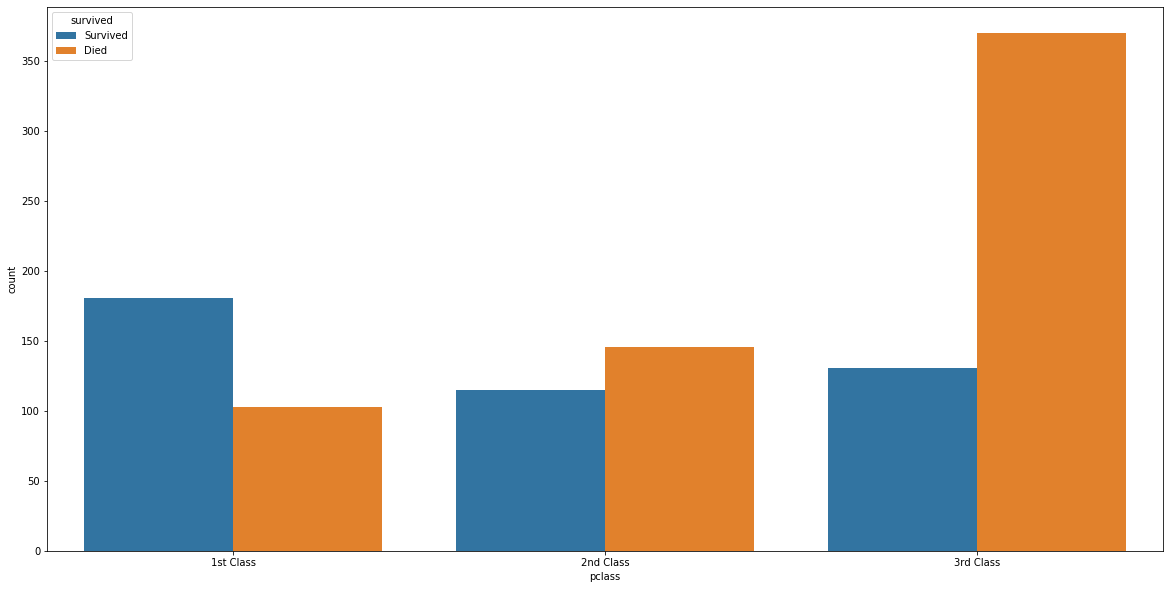

In [59]:
plt.figure(figsize=(20,10))              #Sorry to keep using the same type of graph, but it seems that there are less
                                         #choices when you have a catagorical value.

sns.countplot(data = df1, x = "pclass", hue = "survived")


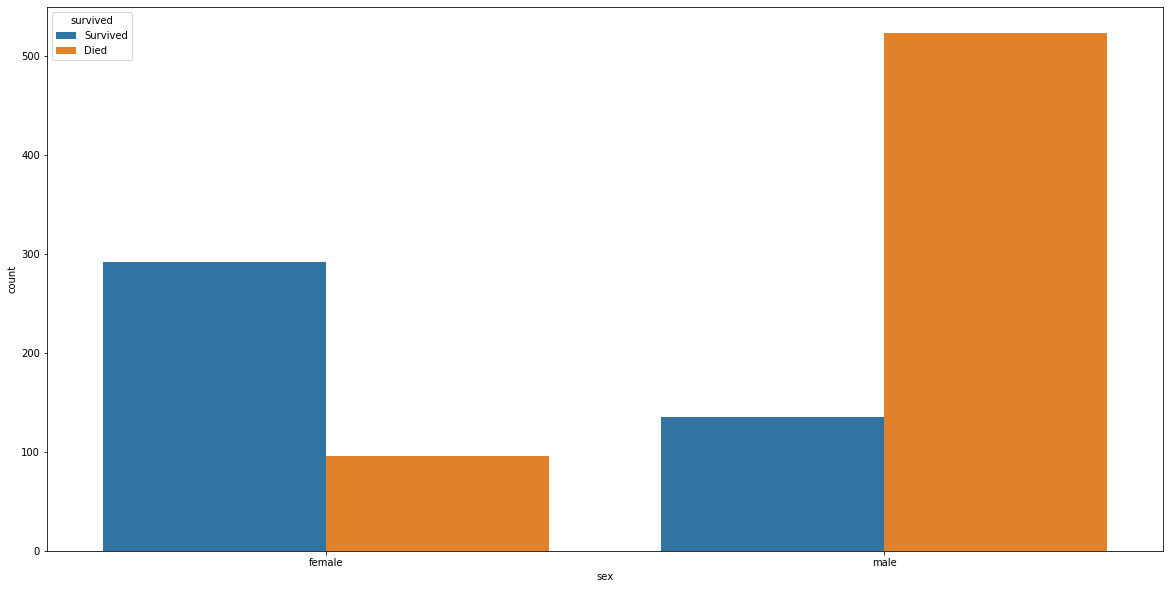

In [60]:
plt.figure(figsize=(20,10))

sns.countplot(data = df1, x = "sex", hue = "survived")


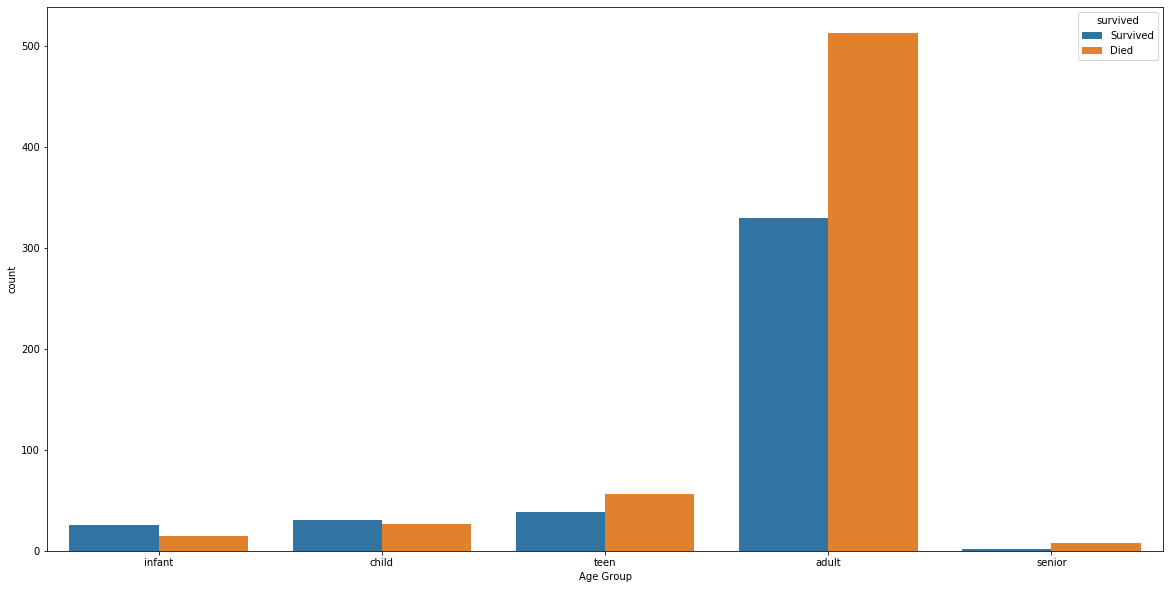

In [61]:
plt.figure(figsize=(20,10))

sns.countplot(data = df1, x = "Age Group", hue = "survived")


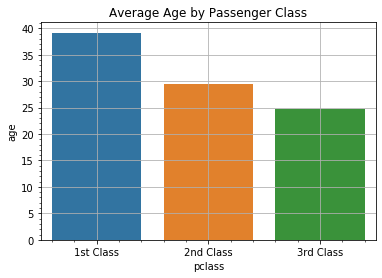

In [62]:
sns.barplot(data = df1, x = "pclass", y = "age", ci = None)

plt.title('Average Age by Passenger Class')
plt.grid()
plt.minorticks_on() 

Text(0.5, 1.0, 'Distribution of Age Across Passenger Class')

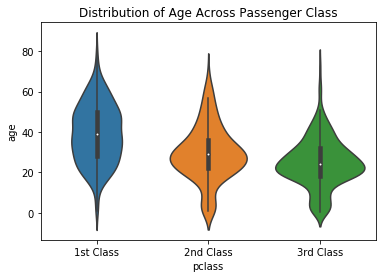

In [63]:
sns.violinplot(x = df1["pclass"], y = df["age"])
plt.title('Distribution of Age Across Passenger Class')